##  FCN-8 quantitative/qualitative  evaluations

In [8]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from DataGenerator_OpenCV import DataGenerator
from models_FCN import FCN_8
from utilities import dice, iou

In [9]:
# Instance variables
input_shape    = (768, 896, 3)
image_file_ext = r".tif"
image_xml_ext  = r".xml"
masks_file_ext = r".TIF"
test_dir_p     = "datasets-binary/test"
BASE           = 5

In [10]:
def plot_all(images):
    title = [ "Original Image (RGB)", "Ground Truth Mask", "Predicted Mask" ]
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(15,15) )
    i = 0
    
    for y in range(3):
        axes[y].set_title( title[y] )
        axes[y].imshow(images[i], cmap="gray" )
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1
        
    plt.show()

In [11]:
model = FCN_8( input_shape, pre_trained=True, base=BASE )

Model: "FCN_8_base_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 768, 896, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 768, 896, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 768, 896, 32) 896         lambda_1[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 768, 896, 32) 9248        block1_conv1[0][0]               
_______________________________________________________________________________________

In [12]:
test_img_list = [os.path.join(test_dir_p + "/images", _) for _ in os.listdir(test_dir_p + "/images") if _.endswith(image_file_ext)]
test_mask_list = [os.path.join(test_dir_p + "/masks", _) for _ in os.listdir(test_dir_p + "/masks") if _.endswith(masks_file_ext)]
# print(test_img_list)

# Create pair list
img_mask_pair_list = []
for image_fp, mask_fp in zip( test_img_list, test_mask_list):
    img_mask_pair_list.append( (image_fp, mask_fp) )

### Prediction with batch size 5

In [13]:
testDataGenerator = DataGenerator( [input_shape[0], input_shape[1], input_shape[2]], 
                                    test_img_list, 
                                    test_mask_list,
                                    batch_size=5)

X, y = testDataGenerator.__getitem__(0)
print(X.shape)
print(y.shape)

#loss, dice = model.evaluate(testDataGenerator)
loss, acc_metric = model.evaluate(testDataGenerator)
print(model.name)
print("Overall Loss: \x1b[1;31m", round(loss,4), '\x1b[0m', "Overall Dice: \x1b[1;31m", round(acc_metric,4), '\x1b[0m' )    

(5, 768, 896, 3)
(5, 768, 896, 1)
  ...
    to  
  ['...']
3/3 [==============================] - 2s 610ms/step - loss: 0.4135 - dice: 0.0269
FCN_8_base_5
Overall Loss:  0.4135  Overall Dice:  0.0269 


### Full Testing Set / Single prediction

Image ID: ytma49_111303_benign2_ccd.tif
Dice:  0.0465 


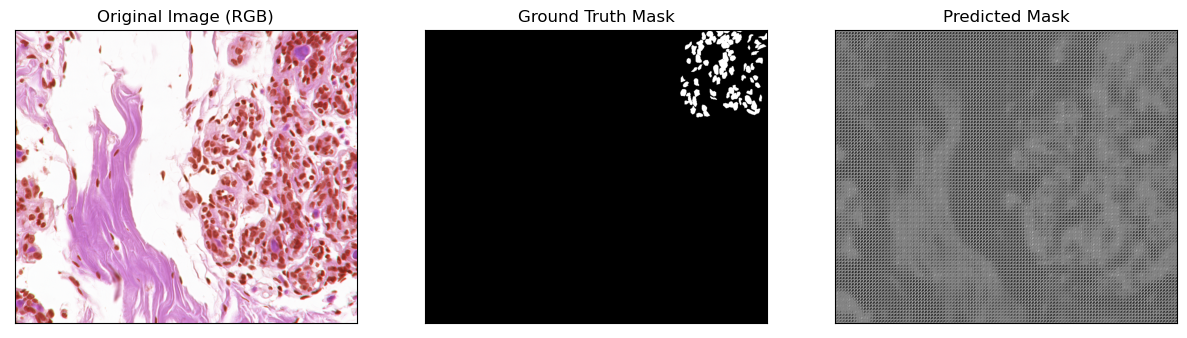

Image ID: ytma49_111303_benign3_ccd.tif
Dice:  0.0413 


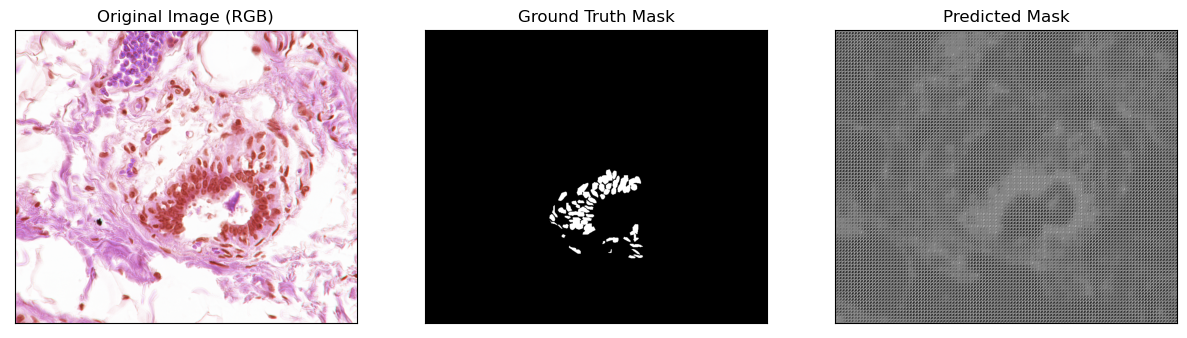

Image ID: ytma49_111303_malignant1_ccd.tif
Dice:  0.0456 


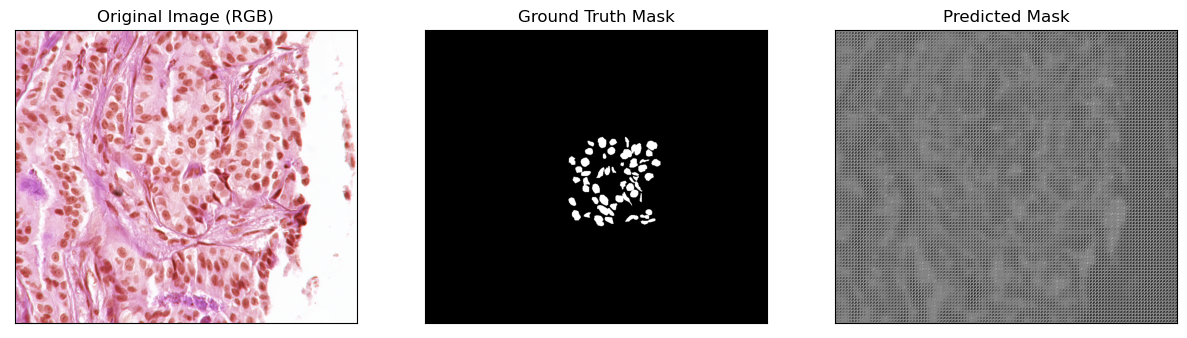

Image ID: ytma49_111303_malignant2_ccd.tif
Dice:  0.044 


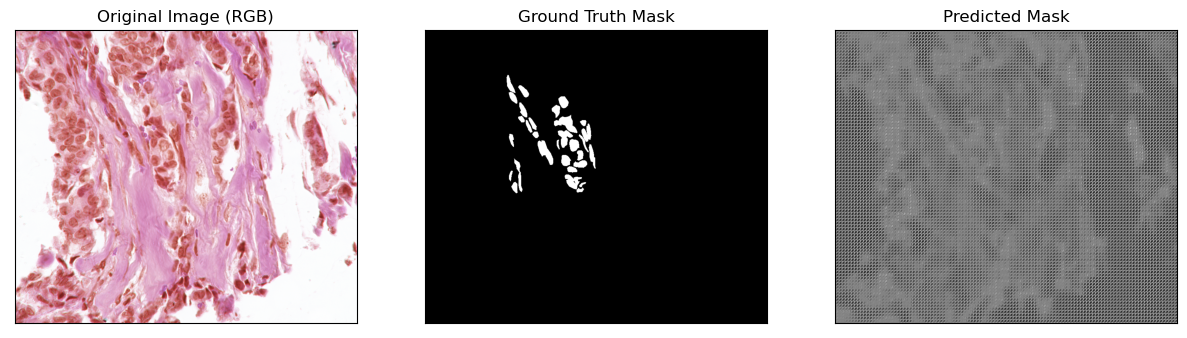

Image ID: ytma49_111303_malignant3_ccd.tif
Dice:  0.0193 


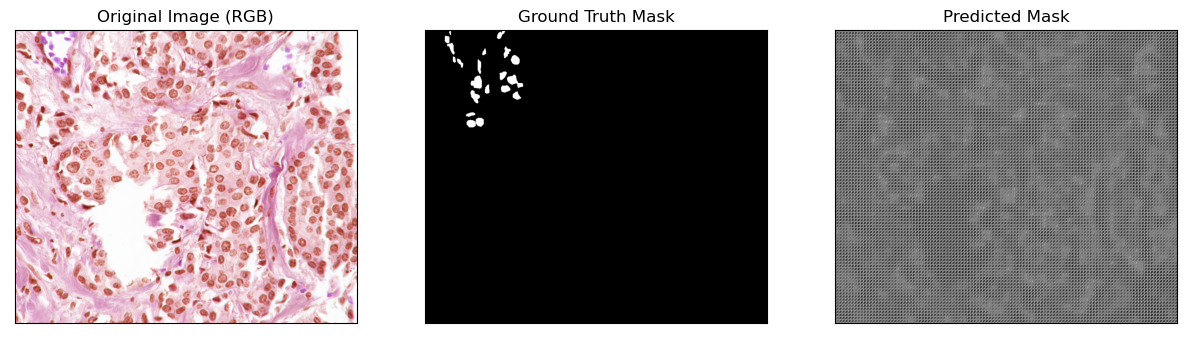

Image ID: ytma55_030603_benign1_ccd.tif
Dice:  0.0288 


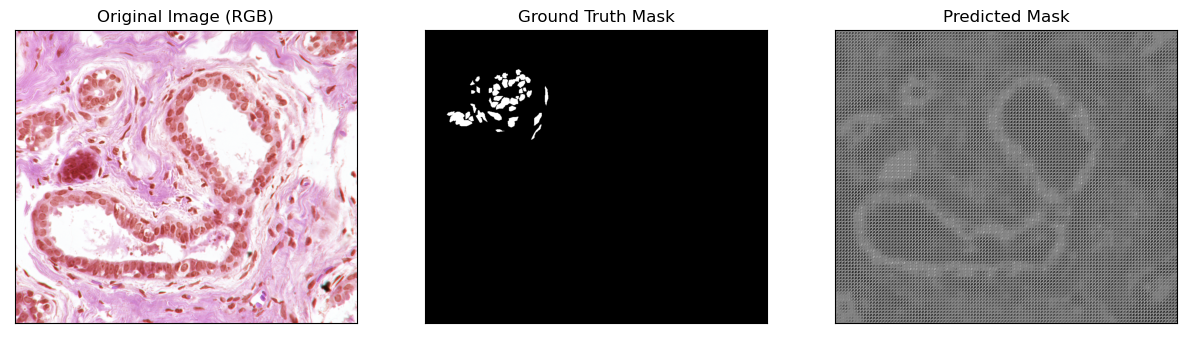

Image ID: ytma55_030603_benign2_ccd.tif
Dice:  0.0292 


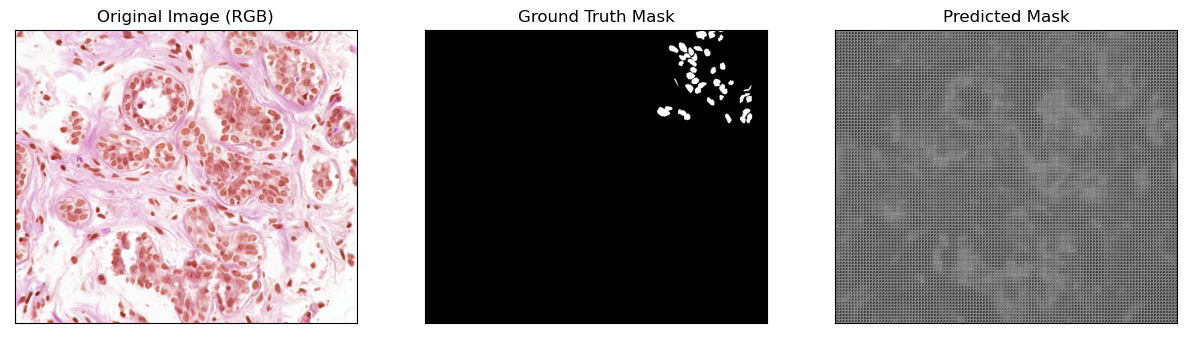

Image ID: ytma55_030603_benign3_ccd.tif
Dice:  0.0403 


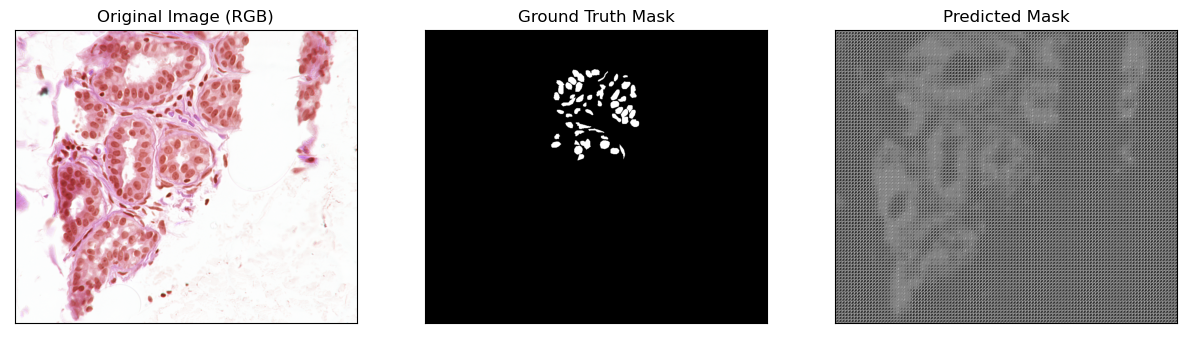

Image ID: ytma55_030603_benign4_ccd.tif
Dice:  0.0272 


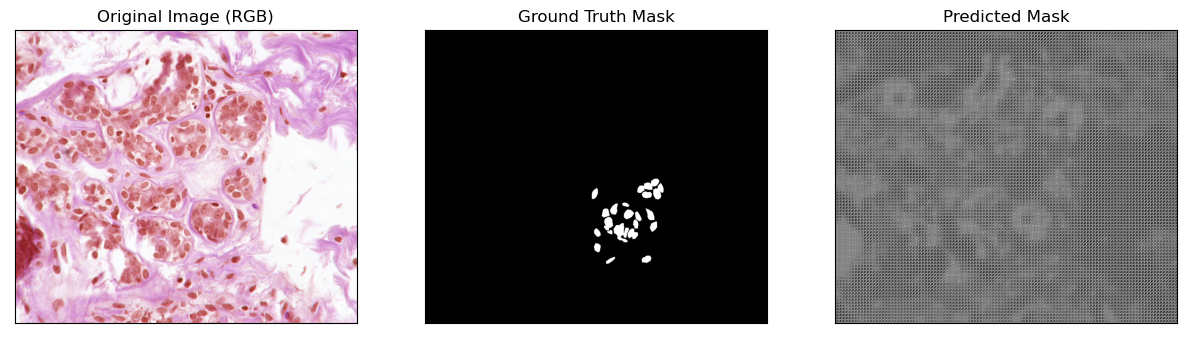

Image ID: ytma55_030603_benign5_ccd.tif
Dice:  0.0637 


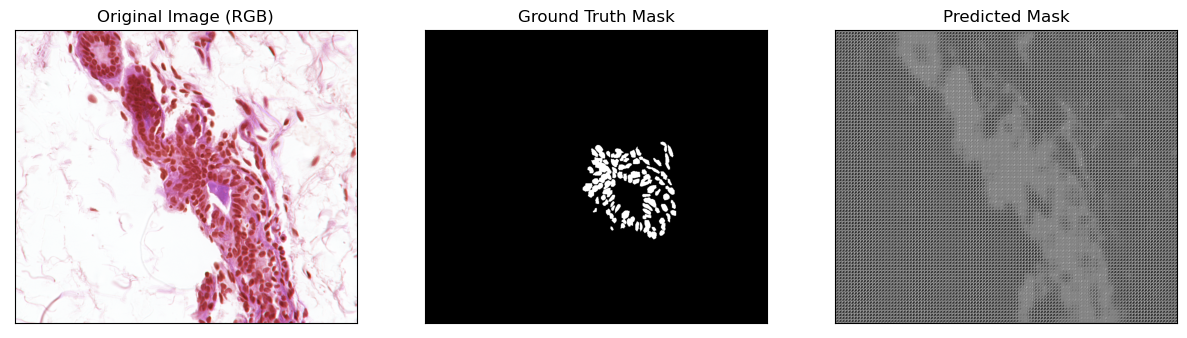

Image ID: ytma55_030603_benign6_ccd.tif
Dice:  0.0183 


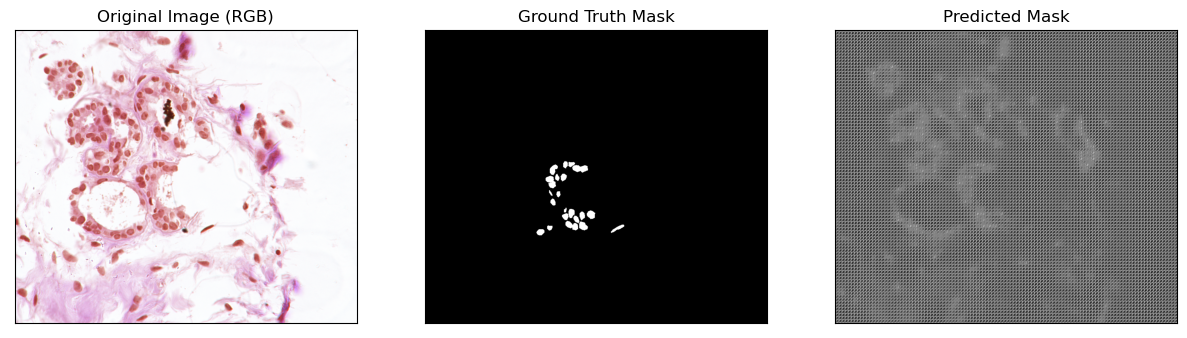

In [14]:
testDataGenerator = DataGenerator( [input_shape[0], input_shape[1], input_shape[2]], 
                                    test_img_list, 
                                    test_mask_list,
                                    batch_size=11)

for x,y in testDataGenerator.__iter__():
    
    for index, (x_i, y_i, file_n)in enumerate(zip(x, y, test_img_list)):
        
        # Predict
        single_predict = model.predict( np.expand_dims(x_i, axis=0) )
        dice_score = dice( y_i, single_predict , smooth=0 )
                
        y_predict = np.squeeze(single_predict) * 255.0
        predicted_mask = np.array(y_predict, dtype=np.uint8)
        
        # Display
        print("Image ID:",  file_n.split("\\",1)[1])
        print( "Dice: \x1b[1;31m", round(dice_score.numpy(),4), '\x1b[0m' )
        # print( "IOU: \x1b[1;31m", round(m.result().numpy()), '\x1b[0m' )
        
        plot_all([ x_i/255,
                   y_i.squeeze(),
                   predicted_mask
                  ])